In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/948.2 kB ? eta -:--:--
     - ----------------------------------- 30.7/948.2 kB 325.1 kB/s eta 0:00:03
     -- ---------------------------------- 61.4/948.2 kB 465.5 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/948.2 kB 847.9 kB/s eta 0:00:01
     --------- ---------------------------- 235.5/948.2 kB 1.1 MB/s eta 0:00:01
     ------------------ ------------------- 460.8/948.2 kB 1.8 MB/s eta 0:00:01
     ---------------------------- --------- 706.6/948.2 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyprojec

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [16]:
start = '2012-01-01'
end = '2024-12-22'
stock = 'GOOG'
data = yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed


In [19]:
data.reset_index(inplace=True)

In [20]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131855,16.379533,16.126146,16.358437,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3259,2024-12-16,198.160004,200.639999,194.110001,194.365005,32248600
3260,2024-12-17,197.119995,202.880005,196.690002,198.529999,24129500
3261,2024-12-18,190.149994,198.690002,189.279999,196.830002,27638400


In [22]:
ma_100_days  = data.Close.rolling(100).mean()  
# ma - moving avg of last 100 days

In [25]:
# ma_100_days.tail(100)

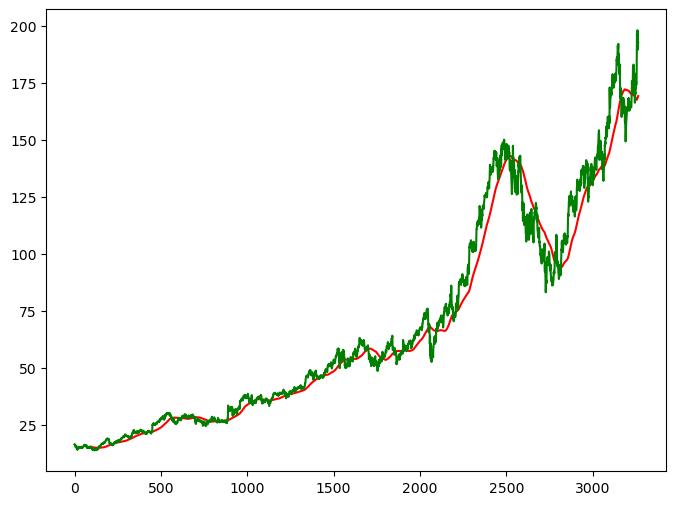

In [29]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [30]:
ma_200_days = data.Close.rolling(200).mean()


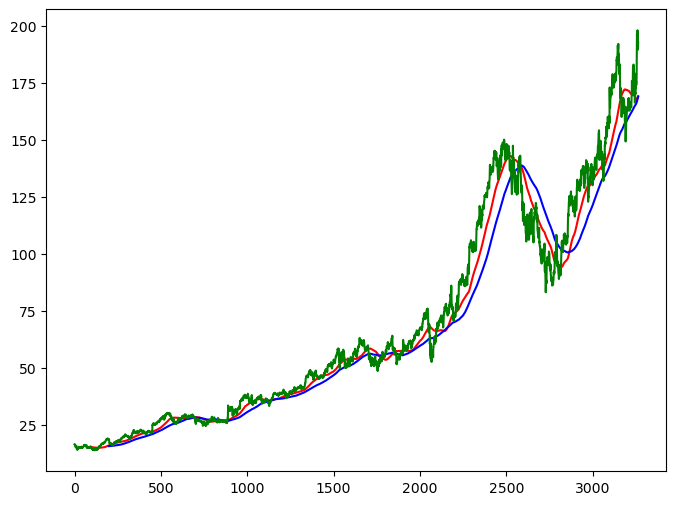

In [32]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [33]:
data.dropna(inplace=True)

In [39]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)]) # 80 % for train
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)]) # 20 % for test


In [40]:
data_train.shape[0]

2611

In [43]:
data_test.shape[0]

653

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [45]:
data_train_scale = scaler.fit_transform(data_train)


In [48]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [55]:
import tensorflow as tf

In [56]:
from tensorflow import keras

In [63]:
x, y = np.array(x), np.array(y)

In [57]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [66]:
model  = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [67]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [68]:
model.fit(x,y, epochs = 50, batch_size=32, verbose = 1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - loss: 0.0452
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0062
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0057
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0037
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0043
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0038
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0039
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0035
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0033
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.0032
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0028
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0026
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0027
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0024
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [69]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [70]:
pas_100_days = data_train.tail(100)

In [71]:
data_test = pd.concat([pas_100_days,data_test], ignore_index = True)

In [73]:
data_test_scale = scaler.fit_transform(data_test)

In [75]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)    

In [76]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


In [79]:
scale = 1/scaler.scale_

In [80]:
y_predict = y_predict* scale

In [81]:
y = y*scale

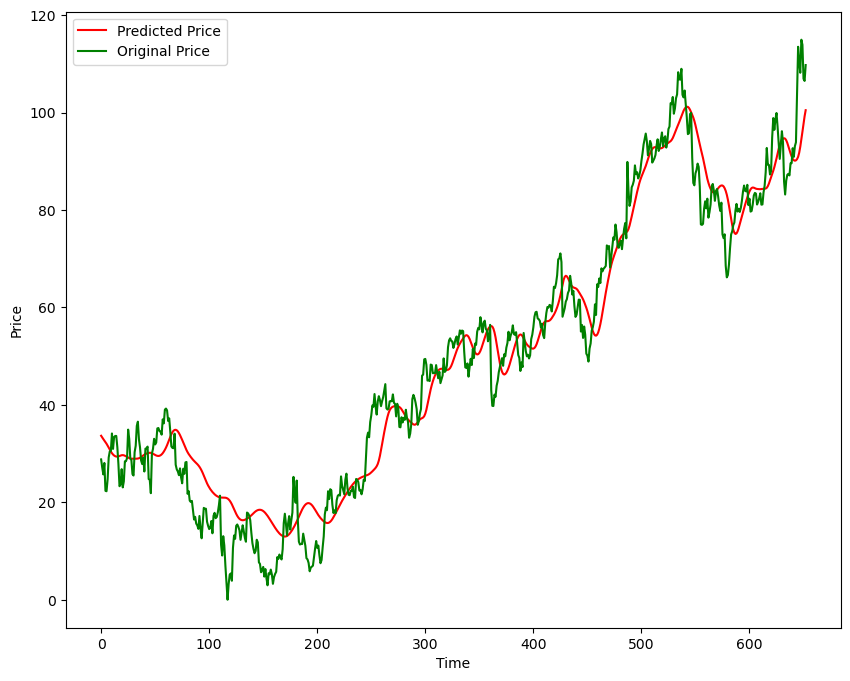

In [83]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [84]:
model.save('Stock Prediction Model.keras')